# Spatial Mapping of Stellar Populations in M31

# Importing all packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.table import Table, vstack

# Opening fits files and combining each half brick

In [2]:
b1_east = Table.read("b1_east.fits", format = "fits")
b1_west = Table.read("b1_west.fits", format = "fits")

b12_east = Table.read("b12_east.fits", format = "fits")
b12_west = Table.read("b12_west.fits", format = "fits")

b23_east = Table.read("b23_east.fits", format = "fits")
b23_west = Table.read("b23_west.fits", format = "fits")

#combining with east first and west second
brick1 = vstack([b1_east, b1_west])
brick12 = vstack([b12_east, b12_west])
brick23 = vstack([b23_east, b23_west])

# Checking all column names

In [3]:
dataframe = b1_east.to_pandas()
print(dataframe.columns)

Index(['x', 'y', 'ra', 'dec', 'chi_gl', 'snr_gl', 'sharp_gl', 'round_gl',
       'crowd_gl', 'f475w_count', 'f475w_sky', 'f475w_rate', 'f475w_raterr',
       'f475w_vega', 'f475w_trans', 'f475w_err', 'f475w_chi', 'f475w_snr',
       'f475w_sharp', 'f475w_round', 'f475w_crowd', 'f814w_count', 'f814w_sky',
       'f814w_rate', 'f814w_raterr', 'f814w_vega', 'f814w_trans', 'f814w_err',
       'f814w_chi', 'f814w_snr', 'f814w_sharp', 'f814w_round', 'f814w_crowd',
       'f275w_count', 'f275w_sky', 'f275w_rate', 'f275w_raterr', 'f275w_vega',
       'f275w_trans', 'f275w_err', 'f275w_chi', 'f275w_snr', 'f275w_sharp',
       'f275w_round', 'f275w_crowd', 'f336w_count', 'f336w_sky', 'f336w_rate',
       'f336w_raterr', 'f336w_vega', 'f336w_trans', 'f336w_err', 'f336w_chi',
       'f336w_snr', 'f336w_sharp', 'f336w_round', 'f336w_crowd', 'f110w_count',
       'f110w_sky', 'f110w_rate', 'f110w_raterr', 'f110w_vega', 'f110w_trans',
       'f110w_err', 'f110w_chi', 'f110w_snr', 'f110w_sharp', 'f110

# Extracting necessary columns

In [4]:
cols = ["ra", "dec", "f475w_vega", "f814w_vega", "f475w_err", "f814w_err", "chi_gl", "snr_gl", "sharp_gl", "crowd_gl", "f475w_st", "f814w_st"] #F475W is blue optical light and F814W is red/NIR light

brick1_useful_columns = brick1[cols] #makes a new list with required columns
brick1_df = brick1_useful_columns.to_pandas() #converts the new list a pandas dataframe and steps are repeated below for each brick

brick12_useful_columns = brick12[cols]
brick12_df = brick12_useful_columns.to_pandas() 

brick23_useful_columns = brick23[cols]
brick23_df = brick23_useful_columns.to_pandas() 

print ("Shape of original brick 1 file with both half bricks: ", brick1_df.shape) #printing the shape of the original bricks to compare before and after filtering
print ("Shape of original brick 12 file with both half bricks: ", brick12_df.shape)
print ("Shape of original brick 23 file with both half bricks: ", brick23_df.shape)

Shape of original brick 1 file with both half bricks:  (8422853, 12)
Shape of original brick 12 file with both half bricks:  (6060013, 12)
Shape of original brick 23 file with both half bricks:  (3838716, 12)


# Removing NaN values from all bricks

In [5]:
brick1_df = brick1_df.dropna()
brick12_df = brick12_df.dropna()
brick23_df = brick23_df.dropna()

#brick1_df


# Filter out data using sharpness

In [9]:
# keep stars with sharpness between +- 0.3 from Williams paper cited in the proposal
brick1_df = brick1_df[ ( brick1_df ["sharp_gl"] > -0.3) & (brick1_df ["sharp_gl"] < 0.3)]

brick12_df = brick12_df[ ( brick12_df ["sharp_gl"] > -0.3) & (brick12_df ["sharp_gl"] < 0.3)]

brick23_df = brick23_df[ ( brick23_df ["sharp_gl"] > -0.3) & (brick23_df ["sharp_gl"] < 0.3)]


#print ("Max sharpness after filtering: ", brick1_df["sharp_gl"].max())
#print ("Min sharpness after filtering: ",brick1_df["sharp_gl"].min())

# Filter out data using crowding

In [10]:
# keep stars with crowding less than 2 from Williams paper cited in the proposal

brick1_df = brick1_df[ ( brick1_df ["crowd_gl"] < 2)]

brick12_df = brick12_df[ ( brick12_df ["crowd_gl"] < 2)]

brick23_df = brick23_df[ ( brick23_df ["crowd_gl"] < 2)]


#print ("Max crowd after filtering: ", brick1_df["crowd_gl"].max())

# Filter out data using SNR

In [11]:
# keep stars with SNR higher than 4 from Williams paper cited in the proposal

brick1_df = brick1_df[ ( brick1_df ["snr_gl"] > 4)]

brick12_df = brick12_df[ ( brick12_df ["snr_gl"] > 4)]

brick23_df = brick23_df[ ( brick23_df ["snr_gl"] > 4)]

#print ("Min snr after filtering: ", brick1_df["snr_gl"].min())

# Filter out data using filter err

In [12]:
# keep stars with filter errors less than 0.2 from Williams paper cited in the proposal


brick1_df = brick1_df[ ( brick1_df["f475w_err"] < 0.2) & (brick1_df["f814w_err"] < 0.2)]

brick12_df = brick12_df[ ( brick12_df["f475w_err"] < 0.2) & (brick12_df["f814w_err"] < 0.2)]

brick23_df = brick23_df[ ( brick23_df["f475w_err"] < 0.2) & (brick23_df["f814w_err"] < 0.2)]


#print ("Max filter err after filtering: ", brick1_df["f475w_err"].max())
#print ("Max filter err after filtering: ", brick1_df["f814w_err"].max())

# Looking at final dataframes after applying filters

In [13]:
#brick1_df
#brick12_df
#brick23_df

print ("Shape of filtered brick 1 file with both half bricks: ", brick1_df.shape) #printing the shape of the original bricks to compare before and after filtering
print ("Shape of filtered brick 12 file with both half bricks: ", brick12_df.shape)
print ("Shape of filtered brick 23 file with both half bricks: ", brick23_df.shape)

Shape of filtered brick 1 file with both half bricks:  (7167153, 12)
Shape of filtered brick 12 file with both half bricks:  (3830202, 12)
Shape of filtered brick 23 file with both half bricks:  (1488573, 12)


# Caluclate the color index: F475W - F814W mag

In [14]:
brick1_df['color'] = brick1_df['f475w_vega'] - brick1_df['f814w_vega']
brick12_df['color'] = brick12_df['f475w_vega'] - brick12_df['f814w_vega']
brick23_df['color'] = brick23_df['f475w_vega'] - brick23_df['f814w_vega']

# Preview
print("Brick 1 Color Head:\n", brick1_df['color'].head())

Brick 1 Color Head:
 3    1.608
4    0.772
5    1.137
6    1.639
8    1.678
Name: color, dtype: float64


# Plot the stellar desnity map - Ra vs Dec for Brick 1

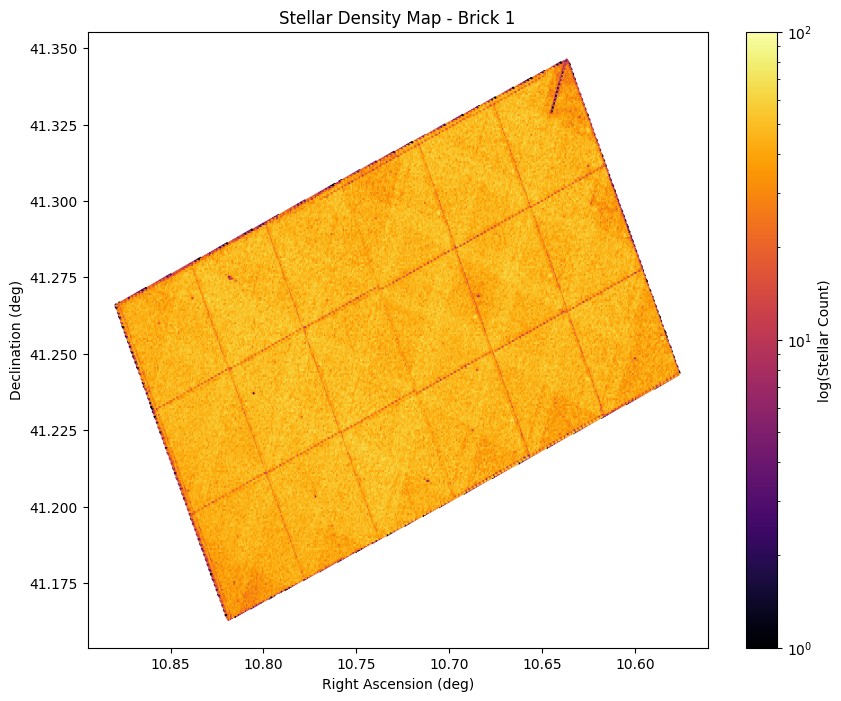

In [15]:
plt.figure(figsize=(10, 8)) # Make the plot large enough to see details

# hexbin plot: x=RA, y=Dec
# gridsize=500 creates a high-resolution map
# bins='log' scales the counts logarithmically so we can see faint and bright structures
# mincnt=1 hides empty bins (makes them white/transparent)
hb = plt.hexbin(brick1_df['ra'], brick1_df['dec'], gridsize=500, cmap='inferno', bins='log', mincnt=1, vmin=1, vmax=100)

# Add a colorbar to show what the colors mean
cb = plt.colorbar(hb, label='log(Stellar Count)')

# Invert RA axis (Astronomical standard: RA increases to the left)
plt.gca().invert_xaxis()

# Labels and Title
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Stellar Density Map - Brick 1')

plt.savefig("brick1_density.png", dpi=300, bbox_inches='tight')

plt.show()

# Plot the stellar desnity map - Ra vs Dec for Brick 12

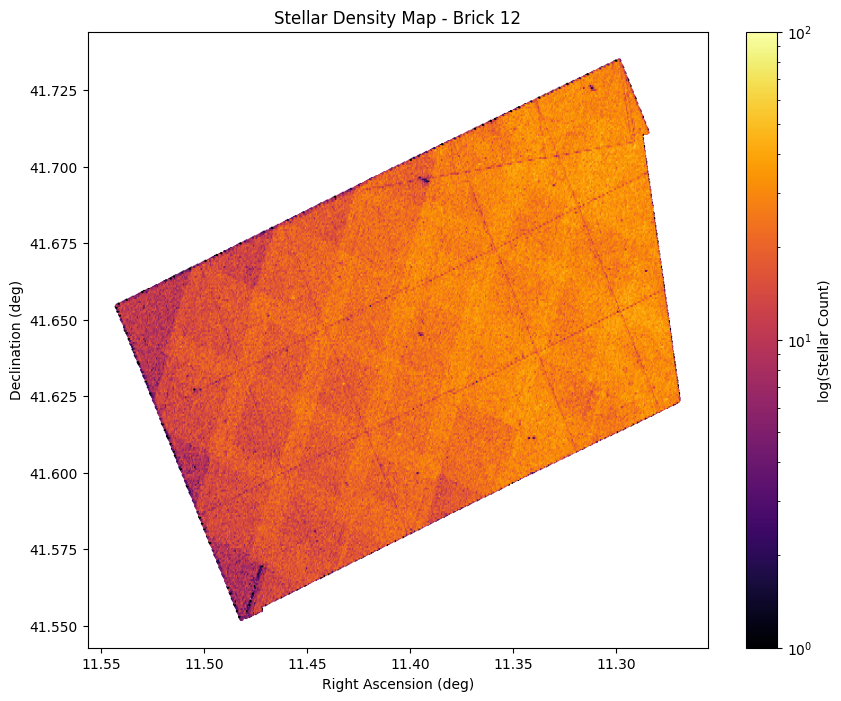

In [16]:
plt.figure(figsize=(10, 8))

# Changing input data to brick12_df
hb = plt.hexbin(brick12_df['ra'], brick12_df['dec'], gridsize=500, cmap='inferno', bins='log', mincnt=1, vmin=1, vmax=100)

cb = plt.colorbar(hb, label='log(Stellar Count)')
plt.gca().invert_xaxis()

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Stellar Density Map - Brick 12')

plt.savefig("brick12_density.png", dpi=300, bbox_inches='tight')

plt.show()

# Plot the stellar desnity map - Ra vs Dec for Brick 23

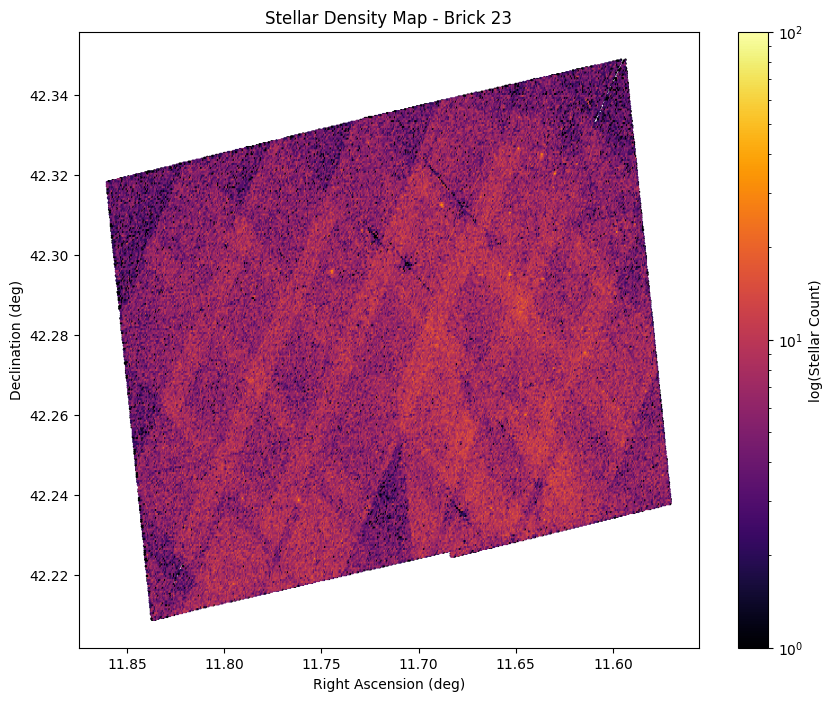

In [17]:
plt.figure(figsize=(10, 8))

# Changing input data to brick23_df
hb = plt.hexbin(brick23_df['ra'], brick23_df['dec'], gridsize=500, cmap='inferno', bins='log', mincnt=1, vmin=1, vmax=100)

cb = plt.colorbar(hb, label='log(Stellar Count)')
plt.gca().invert_xaxis()

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Stellar Density Map - Brick 23')

plt.savefig("brick23_density.png", dpi=300, bbox_inches='tight')


plt.show()

# Plot the mean color map (Ra vs Dec colored by average color) for brick 1

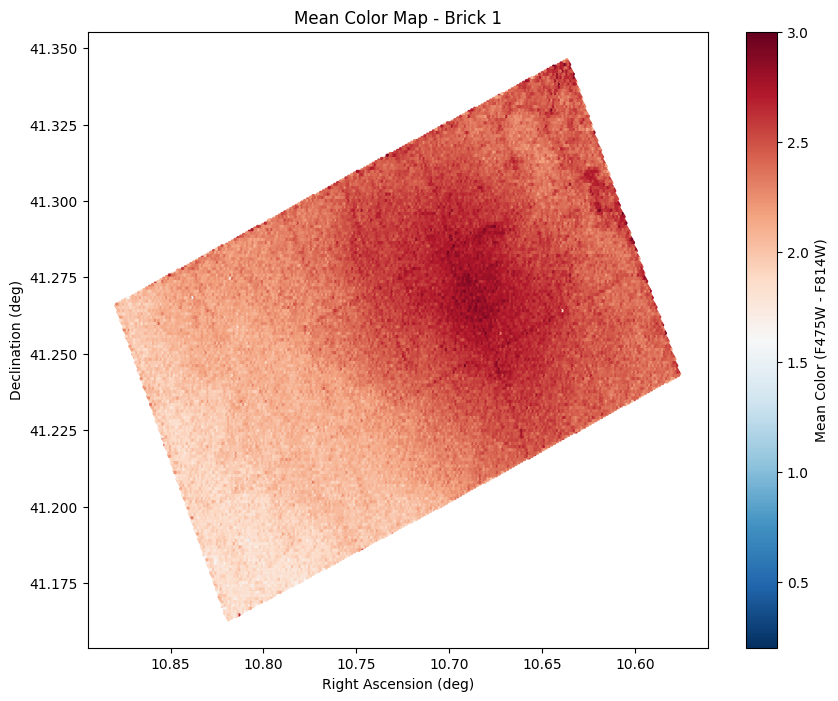

In [22]:
plt.figure(figsize=(10, 8))

# C parameter is the data we want to average (our 'color' column)
# reduce_C_function=np.mean calculates the average color in each hexagon
# cmap='RdBu_r' (Red-Blue reversed) makes Blue=Blue and Red=Red
hb = plt.hexbin(brick1_df['ra'], brick1_df['dec'], C=brick1_df['color'], gridsize=300, 
                cmap='RdBu_r', reduce_C_function=np.mean, mincnt=5, vmin=0.2, vmax=3.0)

cb = plt.colorbar(hb, label='Mean Color (F475W - F814W)')

# Invert RA axis
plt.gca().invert_xaxis()

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Mean Color Map - Brick 1')

plt.savefig("brick1_color.png", dpi=300, bbox_inches='tight')

plt.show()

# Plot the mean color map (Ra vs Dec colored by average color) for brick 12

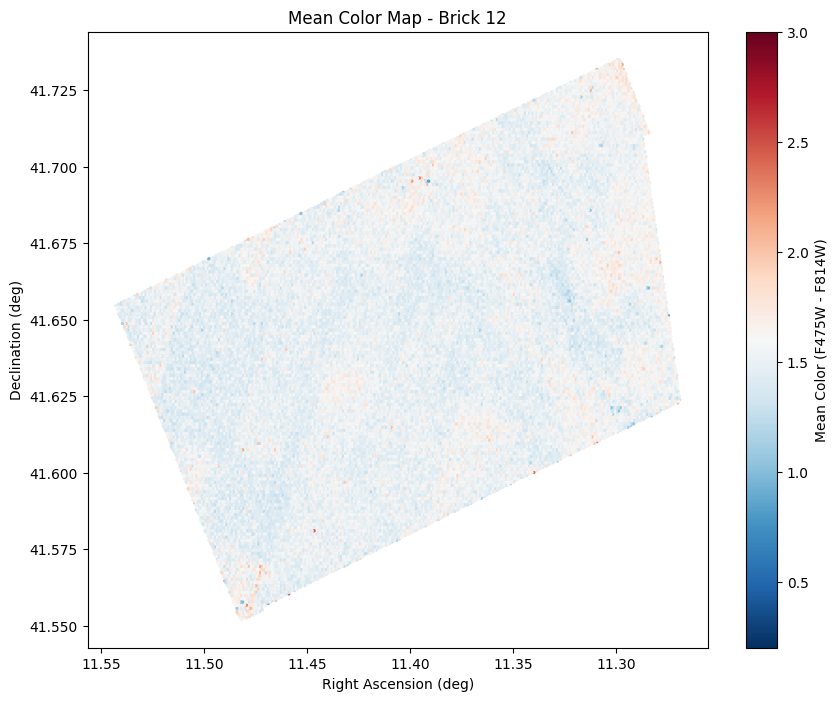

In [23]:
plt.figure(figsize=(10, 8))

# Changing input to brick12_df
hb = plt.hexbin(brick12_df['ra'], brick12_df['dec'], C=brick12_df['color'], gridsize=300, 
                cmap='RdBu_r', reduce_C_function=np.mean, mincnt=5, vmin=0.2, vmax=3.0)

cb = plt.colorbar(hb, label='Mean Color (F475W - F814W)')
plt.gca().invert_xaxis()

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Mean Color Map - Brick 12')

plt.savefig("brick12_color.png", dpi=300, bbox_inches='tight')


plt.show()

# Plot the mean color map (Ra vs Dec colored by average color) for brick 23

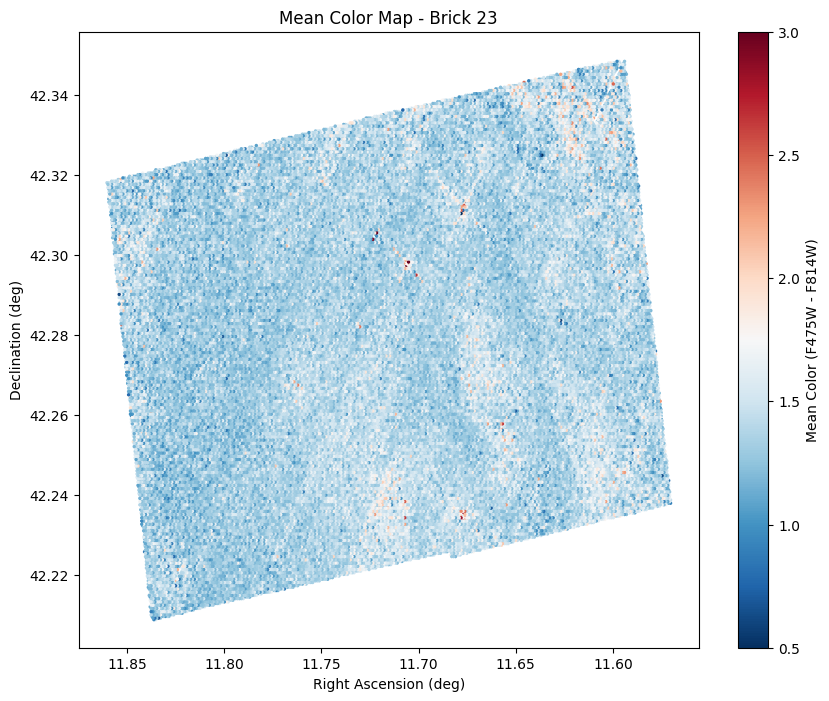

In [24]:
plt.figure(figsize=(10, 8))

# Changing input to brick23_df
hb = plt.hexbin(brick23_df['ra'], brick23_df['dec'], C=brick23_df['color'], gridsize=300, 
                cmap='RdBu_r', reduce_C_function=np.mean, mincnt=5, vmin=0.5, vmax=3.0)

cb = plt.colorbar(hb, label='Mean Color (F475W - F814W)')
plt.gca().invert_xaxis()

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Mean Color Map - Brick 23')

plt.savefig("brick23_color.png", dpi=300, bbox_inches='tight')


plt.show()